In [1]:
import os
from collections import defaultdict
import random
import matplotlib.pyplot as plt
from functools import reduce
from random import choices
import math
import gc 

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

## Task 1

In [2]:
DATA_PATH = "./data"
WIKI_PATH = DATA_PATH + "/wiki"
TEST_PATH = DATA_PATH + "/test"

COMPARISON_ORDER = 6

def read_text_sources(dir_path):
    texts = []
    for filePath in os.listdir(dir_path):
        with open(os.path.join(dir_path, filePath), "r") as file:
            texts.append(file.read())
    return texts

In [3]:
def count_letters(text_sources):
    counter = defaultdict(int)
    for text_source in text_sources:
        for letter in text_source:
            counter[letter] += 1
    return counter


def generaty_probabilities(text_sources):
    counter = count_letters(text_sources)
    sum_of_occurences = sum(counter.values())
    for key in counter.keys():
        counter[key] = counter[key] / sum_of_occurences
    return counter


def generate_text(text_sources, length):
    counter = generaty_probabilities(text_sources)
    letters, probabilities = list(counter.keys()), list(counter.values())
    return "".join(choices(letters, k=length, weights=probabilities))


def frequency_chart(counter):
    sorted_keys = sorted(counter.keys())
    plt.bar(sorted_keys, [counter[key] for key in sorted_keys])
    plt.show()

In [4]:
def add_d(a,b):
    if type(a) is tuple:
        return a+tuple((b,))
    return a+b


def gen_nth_order_probabilities(text, nth_order):
    zeroth_propabilities = generaty_probabilities([text])
    non_conditional_orders = [zeroth_propabilities.copy()]
    conditional_orders = [zeroth_propabilities.copy()]
    for n in range(1, nth_order + 1):
#         print("N: ", n)
        conditional_dict = defaultdict(lambda: defaultdict(int))
        non_conditional_dict = defaultdict(int)
        for l in range(len(text) - n):
            conditional_dict[text[l : l + n]][text[l + n]] += 1
        number_of_n_length_sequences = len(text) - n
        for key in conditional_dict.keys():
            sum_seq_occur = sum(conditional_dict[key].values())
            for sub_key in conditional_dict[key].keys():
                non_conditional_dict[add_d(key,sub_key)] = conditional_dict[key][sub_key] / number_of_n_length_sequences
                conditional_dict[key][sub_key] = conditional_dict[key][sub_key] / sum_seq_occur
        conditional_orders.append(conditional_dict)
        non_conditional_orders.append(non_conditional_dict)
    return conditional_orders, non_conditional_orders

In [5]:
def get_conditional_entropies(text, nth_order):
    conditional_probs, non_conditional_probs = gen_nth_order_probabilities(text, nth_order)
    conditional_entropies  = [0]*(nth_order+1)
    #0th order
    for key, prob in non_conditional_probs[0].items():
        conditional_entropies[0]+=prob*math.log2(1/prob)
    #1 + order
    for i in range(1,nth_order+1):
        cur_entropy = 0
        for key, prob in non_conditional_probs[i].items():
            cur_entropy += prob*math.log2(1/conditional_probs[i][key[:-1]][key[-1]])
        conditional_entropies[i] = cur_entropy
    return conditional_entropies

norm_wiki_ht.txt
LETTER ENTROPIES


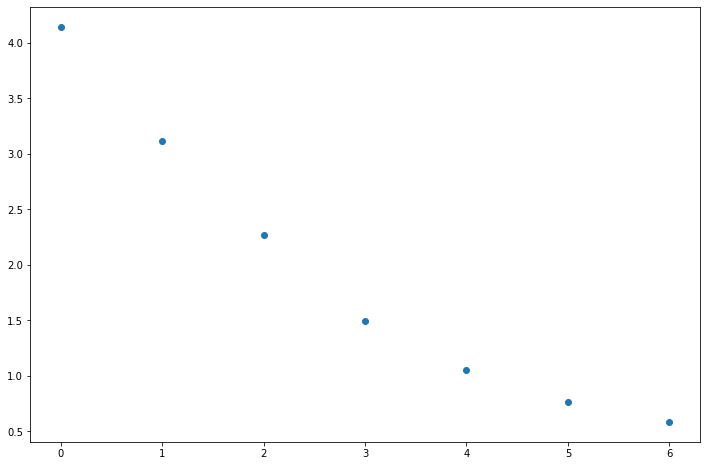

WORD ENTROPIES


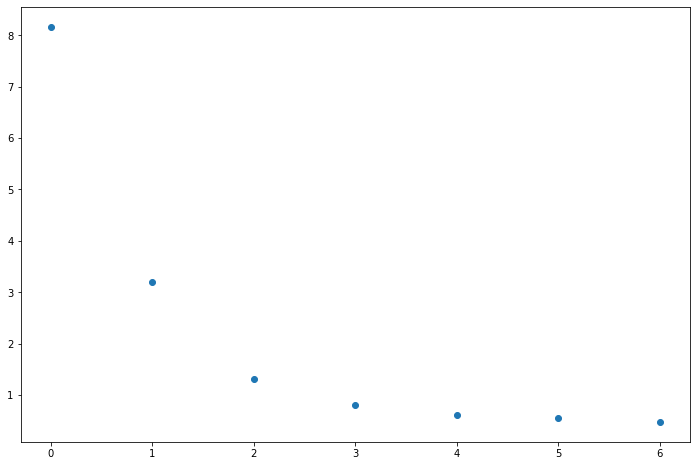

norm_wiki_eo.txt
LETTER ENTROPIES


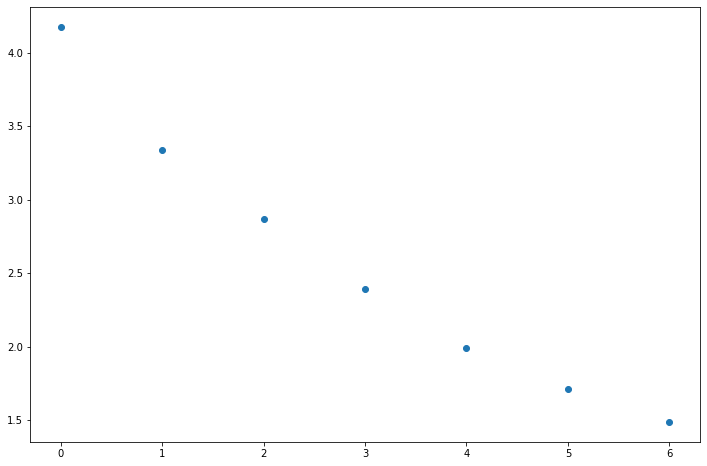

WORD ENTROPIES


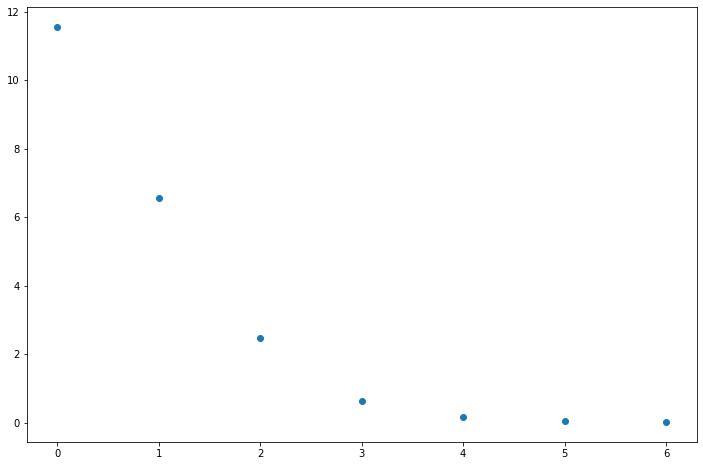

norm_wiki_nv.txt
LETTER ENTROPIES


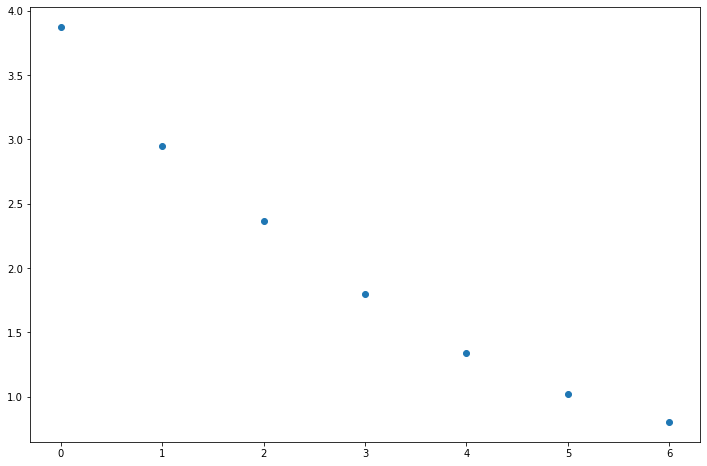

WORD ENTROPIES


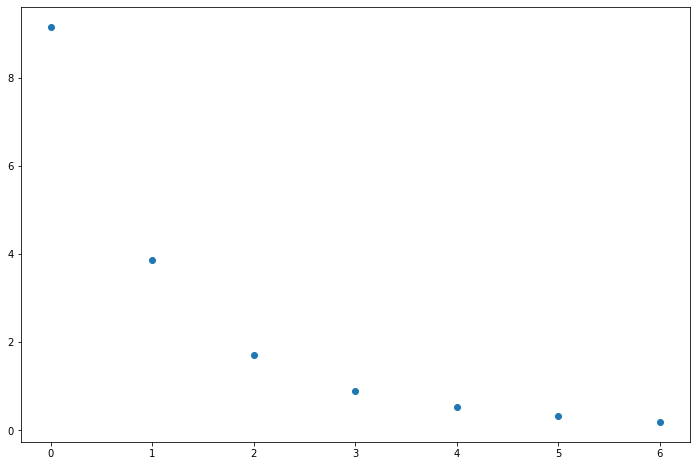

norm_wiki_et.txt
LETTER ENTROPIES


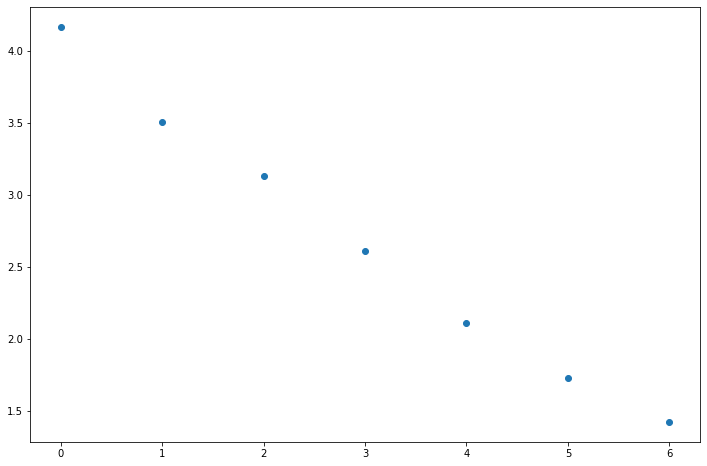

WORD ENTROPIES


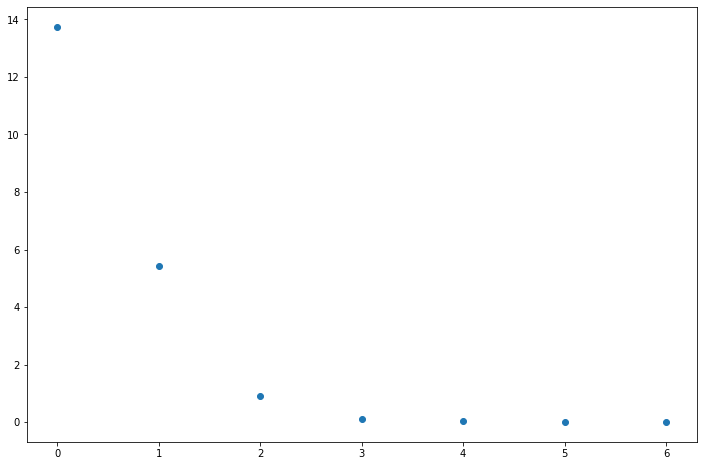

norm_wiki_en.txt
LETTER ENTROPIES


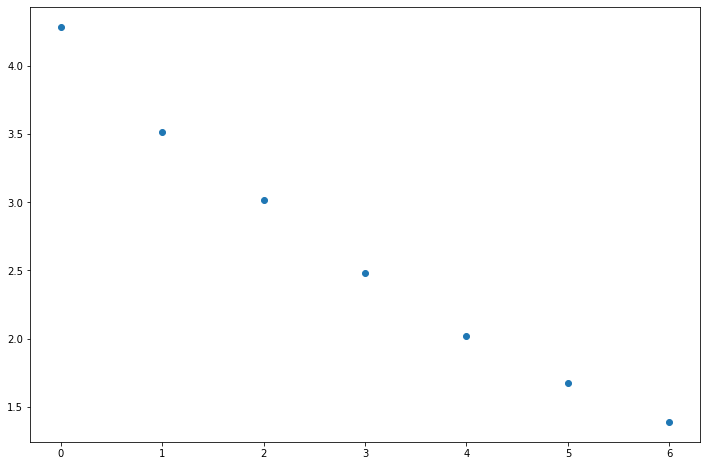

WORD ENTROPIES


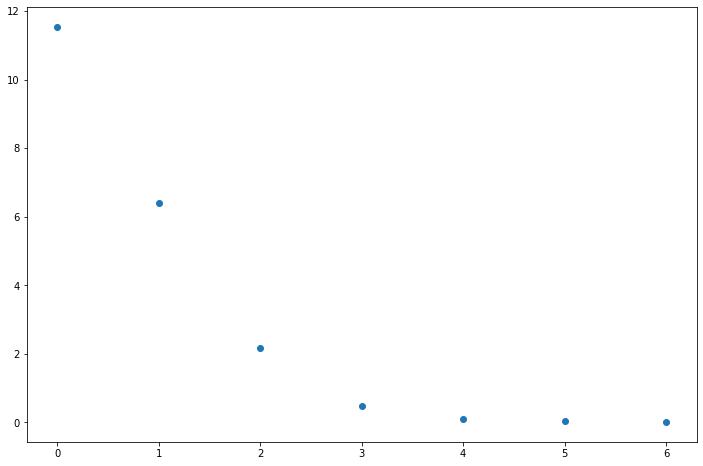

norm_wiki_so.txt
LETTER ENTROPIES


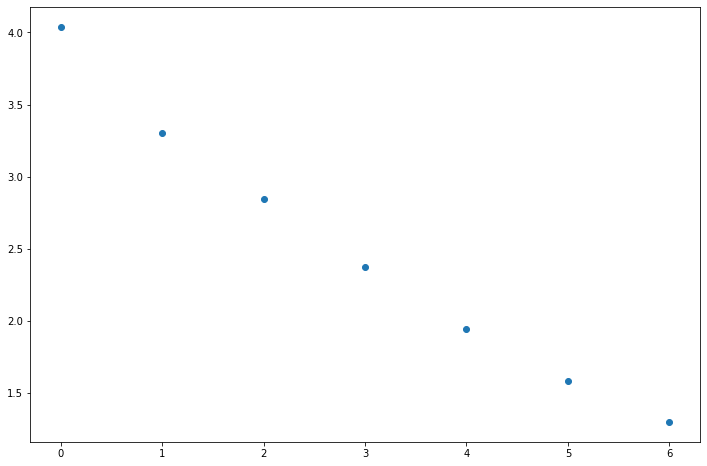

WORD ENTROPIES


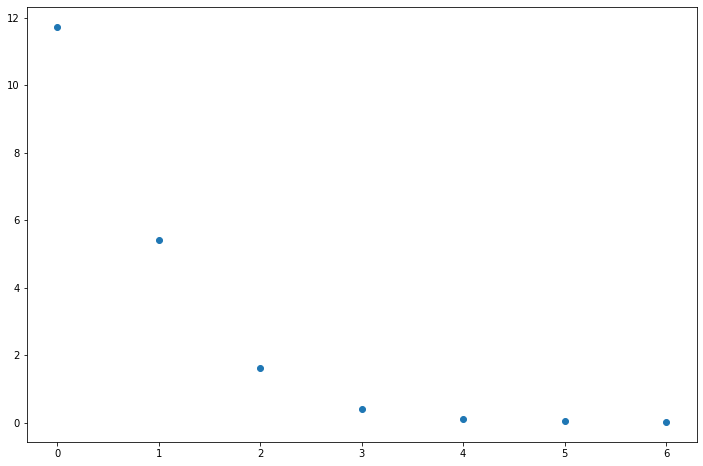

norm_wiki_la.txt
LETTER ENTROPIES


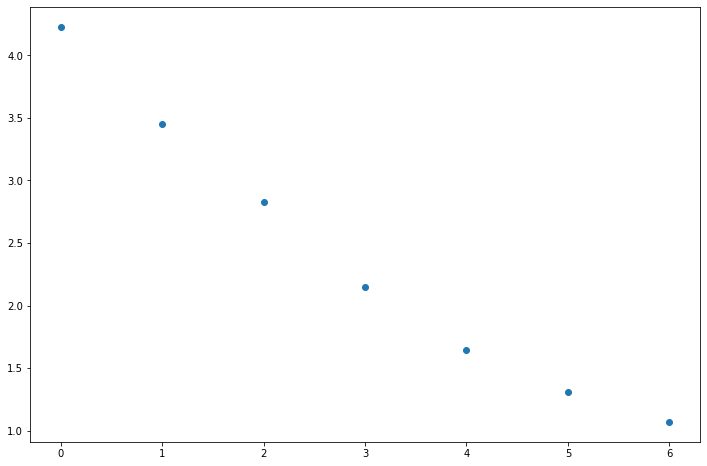

WORD ENTROPIES


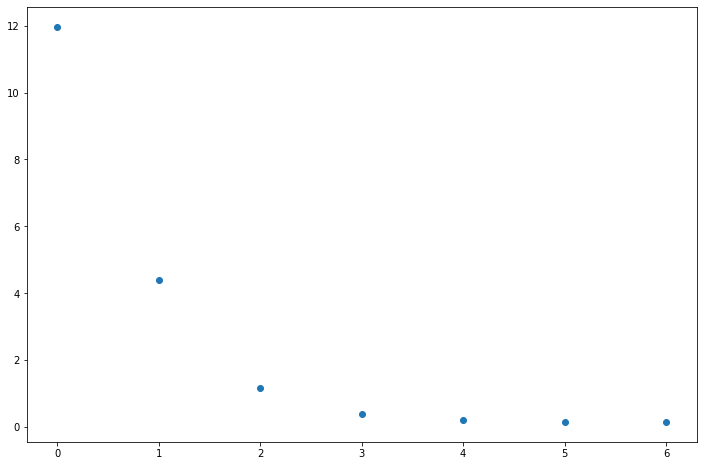

2721

In [6]:
for filePath in os.listdir(WIKI_PATH):
    with open(os.path.join(WIKI_PATH, filePath), "r") as file:
        text=file.read()
    gc.collect()
    print(filePath)
    print("LETTER ENTROPIES")
    letter_entropies = get_conditional_entropies(text, COMPARISON_ORDER)
    plt.scatter([i for i in range(COMPARISON_ORDER+1)], letter_entropies)
    plt.show()
    print("WORD ENTROPIES")
    word_entropies = get_conditional_entropies(tuple(text.split()), COMPARISON_ORDER)
    plt.scatter([i for i in range(COMPARISON_ORDER+1)], word_entropies)
    plt.show()
    print("########################################################################################")
gc.collect()

sample4.txt
LETTER ENTROPIES


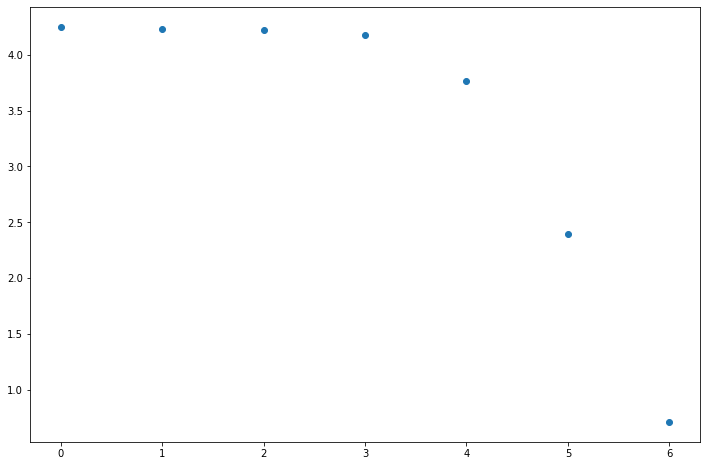

WORD ENTROPIES


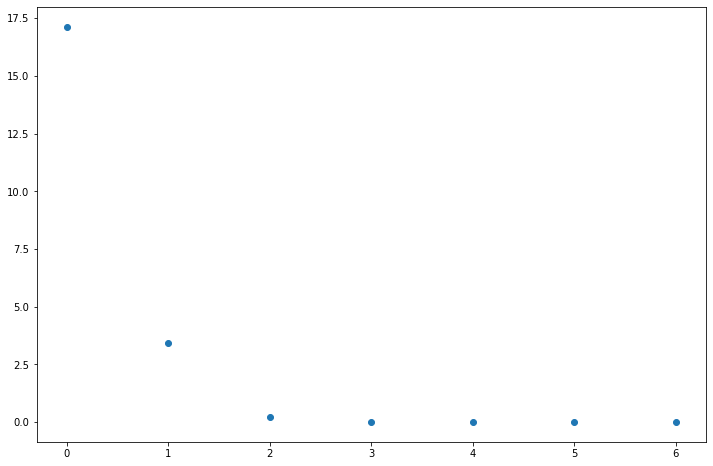

sample5.txt
LETTER ENTROPIES


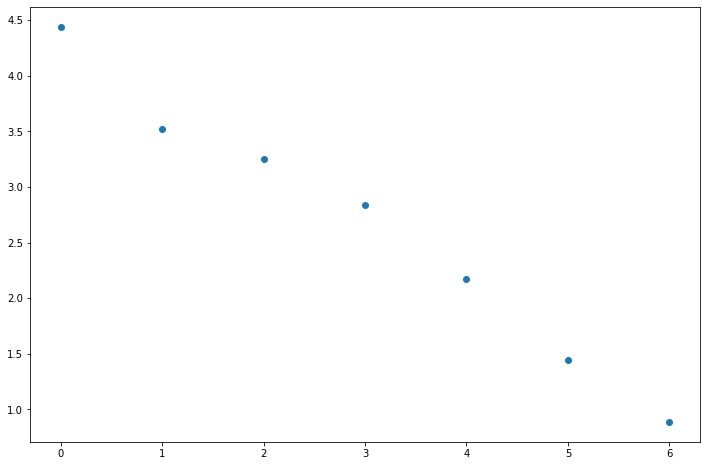

WORD ENTROPIES


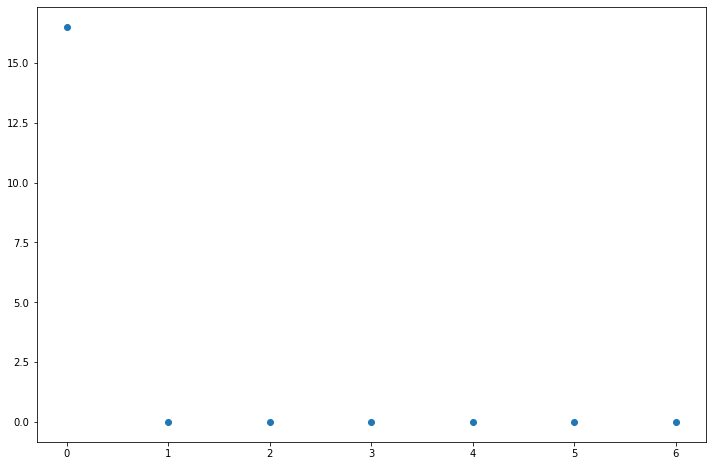

sample1.txt
LETTER ENTROPIES


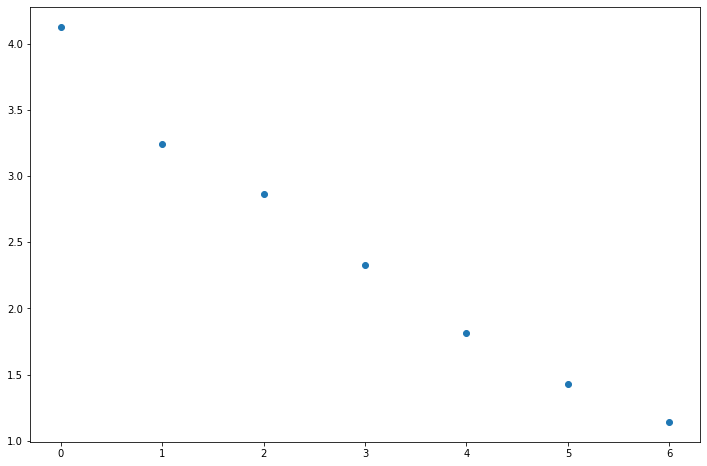

WORD ENTROPIES


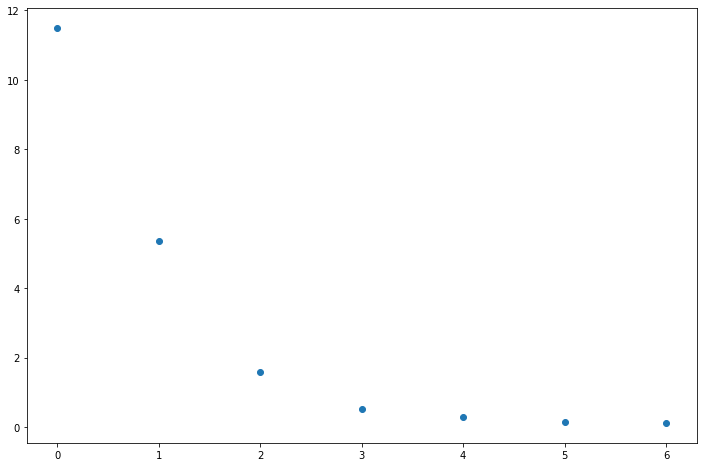

sample2.txt
LETTER ENTROPIES


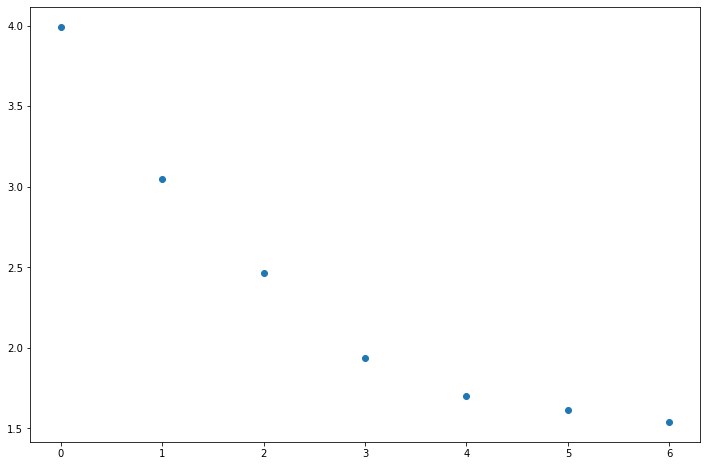

WORD ENTROPIES


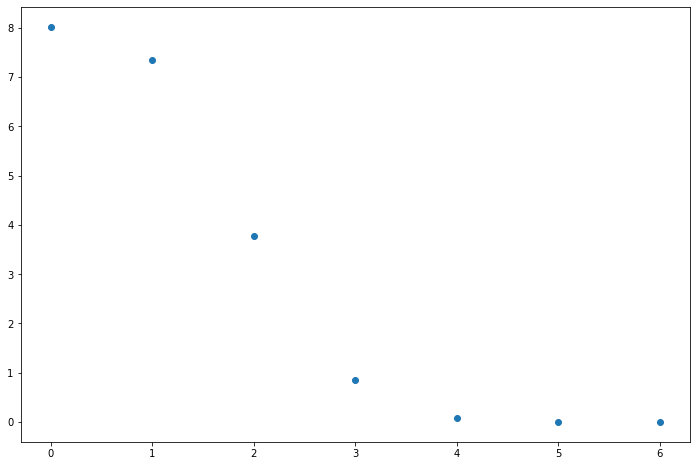

sample3.txt
LETTER ENTROPIES


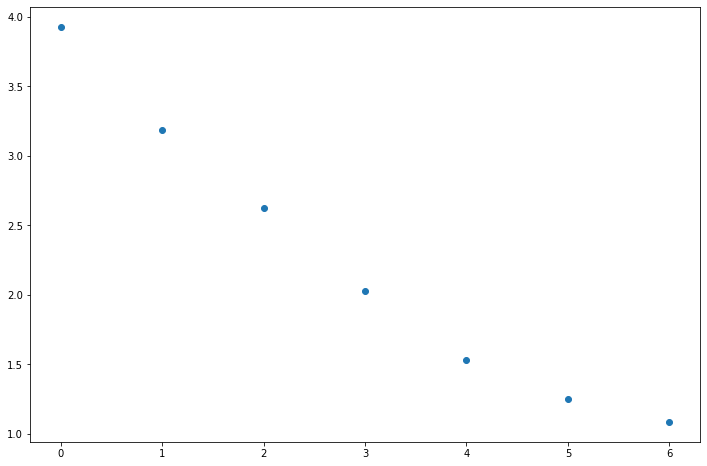

WORD ENTROPIES


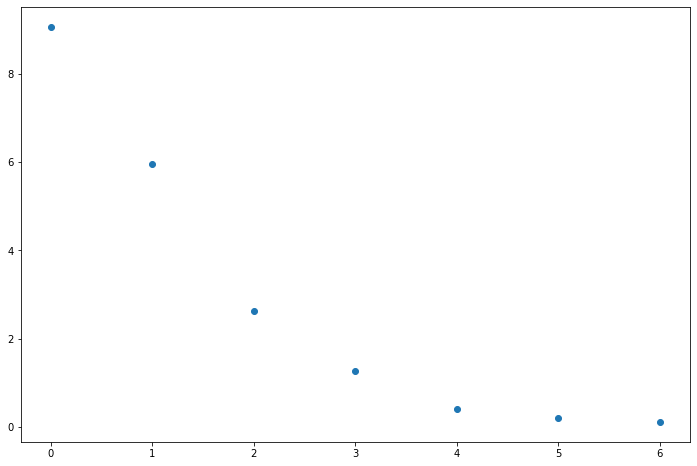

sample0.txt
LETTER ENTROPIES


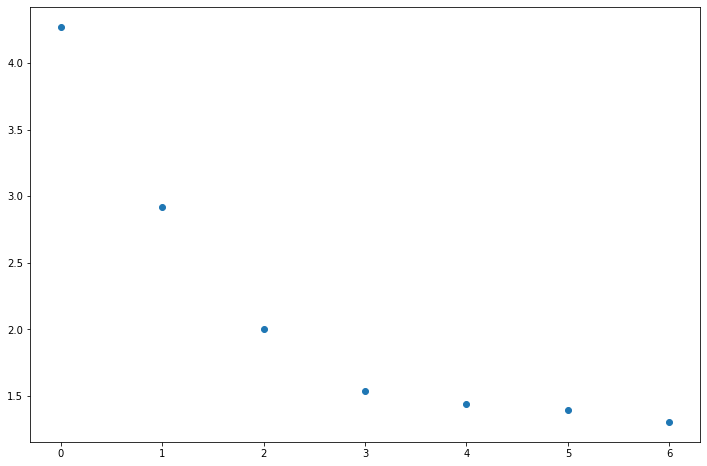

WORD ENTROPIES


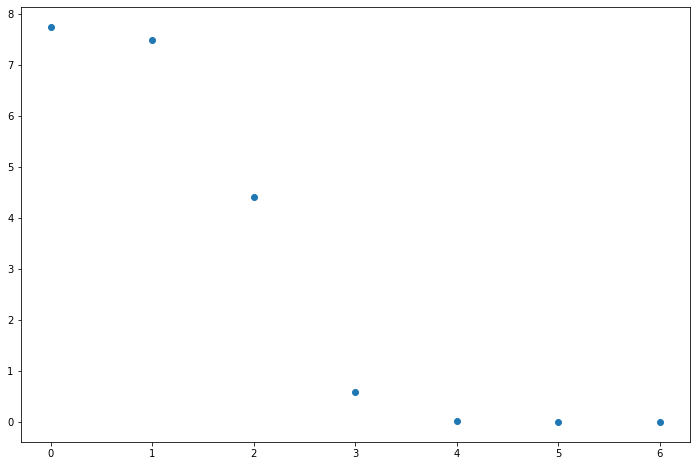

In [7]:
for filePath in os.listdir(TEST_PATH):
    with open(os.path.join(TEST_PATH, filePath), "r") as file:
        text=file.read()
    gc.collect()
    print(filePath)
    print("LETTER ENTROPIES")
    letter_entropies = get_conditional_entropies(text, COMPARISON_ORDER)
    plt.scatter([i for i in range(COMPARISON_ORDER+1)], letter_entropies)
    plt.show()
    print("WORD ENTROPIES")
    word_entropies = get_conditional_entropies(tuple(text.split()), COMPARISON_ORDER)
    plt.scatter([i for i in range(COMPARISON_ORDER+1)], word_entropies)
    plt.show()
    print("########################################################################################")

In [ ]:
#0 dziwny język
#1 tak
#2 tak
#3 tak
#4 maaaaybe raczej nie
#5 nie 